# SD212: Graph mining
## Lab 3: Graph clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results. 

## Import

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np
from scipy import sparse

In [4]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [5]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [6]:
graph = grid(9, 9, True)
adjacency = graph.adjacency
position = graph.position

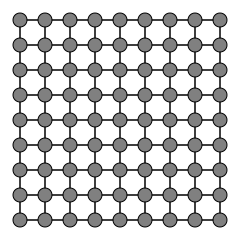

In [7]:
image = svg_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity.

In [8]:
louvain = Louvain()

In [9]:
labels = louvain.fit_predict(adjacency)

0.6220341435185185


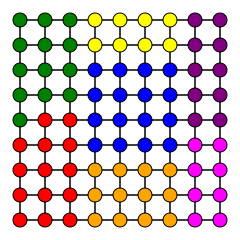

In [10]:
print(get_modularity(adjacency, labels))
image = svg_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

0.623263888888889


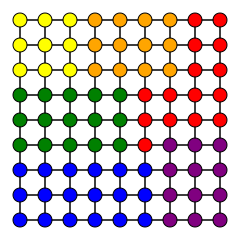

In [11]:
louvain = Louvain(shuffle_nodes=True)
labels = louvain.fit_predict(adjacency)
print(get_modularity(adjacency, labels))
image = svg_graph(adjacency, position, width=200, height=200, labels=labels)
SVG(image)

Even if we shuffle the nodes, there is the same amount of clusters and all clusters keeps the same amount of nodes.

[0 0 0 3 3 3 6 6 6 0 0 0 3 3 3 6 6 6 0 0 0 3 3 3 6 6 6 1 1 1 4 4 4 7 7 7 1
 1 1 4 4 4 7 7 7 1 1 1 4 4 4 7 7 7 2 2 2 5 5 5 8 8 8 2 2 2 5 5 5 8 8 8 2 2
 2 5 5 5 8 8 8]
0.638454861111111


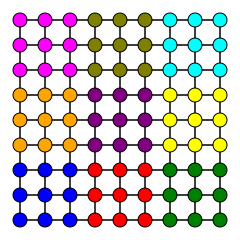

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
3.1086244689504383e-15


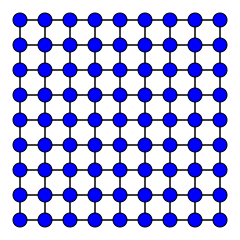

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]
-0.012683256172839505


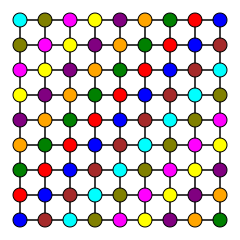

In [12]:
# Trying to find better clustering
n = adjacency.shape[0]
list_of_labels = [np.array([((i%9)//3)*3+(i//9)//3 for i in range(n)]), np.zeros(n, dtype=int), np.arange(0, n, 1)]

for labels in list_of_labels:
    print(labels)
    print(get_modularity(adjacency, labels))
    image = svg_graph(adjacency, position, width=200, height=200, labels=labels)
    display(SVG(image))


## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [13]:
graph = karate_club(metadata=True)

In [14]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

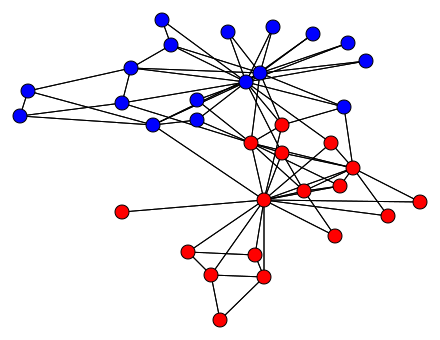

In [15]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* Give the modularity.
* Display the aggregate graph (use ``display_node_weight`` to show the volume of each cluster).
* Display the bipartite graph between clusters and ground-truth labels (use sparse matrix multiplications to get the biadjacency matrix).
* Adapt the resolution to get 2 clusters and repeat the experiments.

In [16]:
louvain = Louvain()

In [17]:
labels = louvain.fit_predict(adjacency)

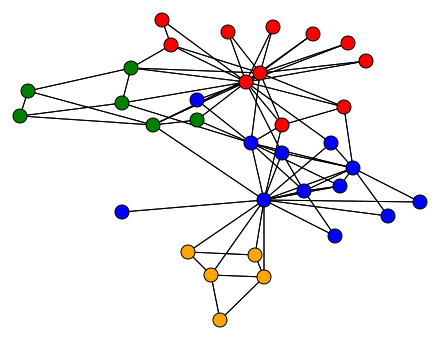

In [18]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [19]:
get_modularity(adjacency, labels)

0.4188034188034188

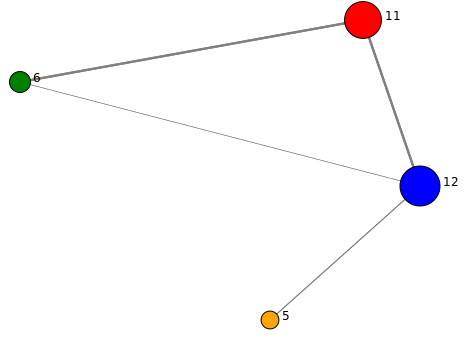

In [20]:
adjacency_aggregate = louvain.aggregate_

average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)

# Display the aggregate graph (use ``display_node_weight`` to show the volume of each cluster).
image = svg_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique, display_node_weight=True, node_weights=counts)
SVG(image)


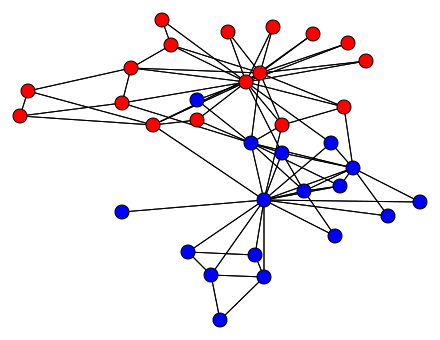

In [21]:
# With Resolution 
louvain = Louvain(resolution=0.5)
labels = louvain.fit_predict(adjacency)
image = svg_graph(adjacency, position, labels=labels)
SVG(image)
# 2 misclassified nodes

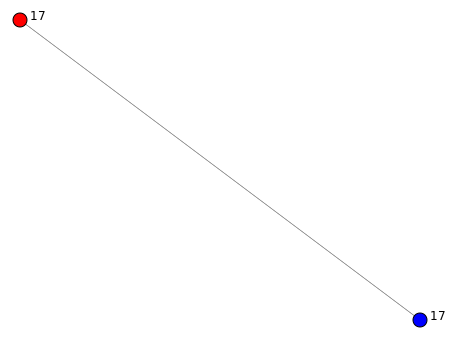

In [22]:
# Aggregate with resolution
adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, position_aggregate, names=counts, labels=labels_unique, display_node_weight=True)
SVG(image)

## Openflights


In [23]:
graph = openflights

In [24]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

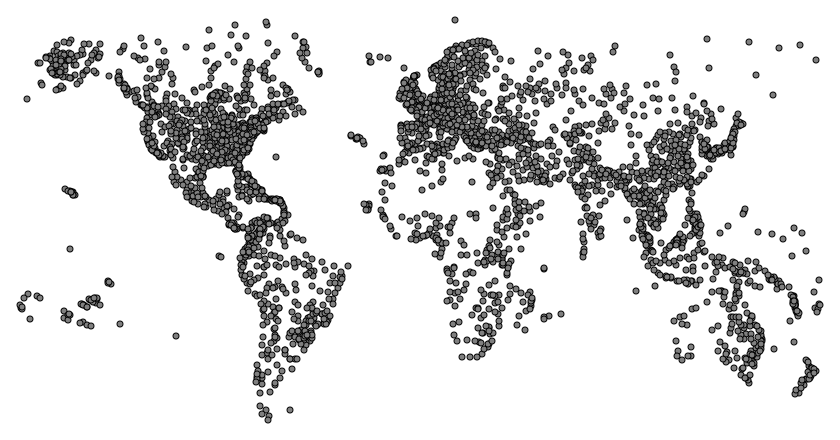

In [25]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? Check the function ``modularity``.<br>
How do you interpret the *inverse* of the Simpson index?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Which of these clusters has the highest inside / outside / total traffic in number of flights?
* Which of these clusters is the strongest?<br>
Display the original graph with the strength of each cluster.

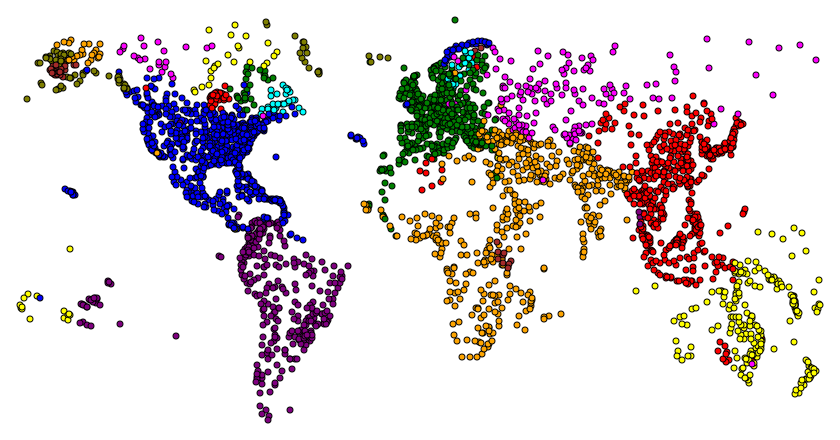

In [26]:
louvain = Louvain()
labels = louvain.fit_predict(adjacency)
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, labels=labels, display_edges=False)
SVG(image)

In [27]:
labels_unique, counts = np.unique(labels, return_counts=True)
print("There is" ,len(labels_unique), "clusters")

There is 35 clusters


In [28]:
get_modularity(adjacency, labels, return_all=True)

print("The inverse of Simpson index is", 1/(get_modularity(adjacency, labels, return_all=True)[2]))
print("The inverse of the Simpson index is the corresponding number of clusters")

The inverse of Simpson index is 4.640574652440379
The inverse of the Simpson index is the corresponding number of clusters


In [29]:

airports = []
for i in labels_unique:
    tot = np.sum(adjacency, axis=1)
    idx = np.where(labels==i)[0]
    m = np.argmax(tot[idx])
    airports.append(idx[m])

names[airports]

array(['Hartsfield Jackson Atlanta International Airport',
       'Beijing Capital International Airport',
       'Amsterdam Airport Schiphol', 'Atatürk International Airport',
       'Guarulhos - Governador André Franco Montoro International Airport',
       'Sydney Kingsford Smith International Airport',
       'Domodedovo International Airport',
       'Ted Stevens Anchorage International Airport',
       'Quebec Jean Lesage International Airport', 'Bethel Airport',
       'Trondheim Airport Værnes', 'Sioux Lookout Airport',
       'Kuujjuarapik Airport', 'Fairbanks International Airport',
       "Faa'a International Airport", 'Rankin Inlet Airport',
       'Yellowknife Airport', 'Godthaab / Nuuk Airport',
       'Stockholm-Bromma Airport', 'Nairobi Wilson Airport',
       'João Paulo II Airport',
       'Touat Cheikh Sidi Mohamed Belkebir Airport', 'Kirkwall Airport',
       'Sitia Airport', 'Myeik Airport', 'Eilat Airport',
       'Vilhelmina Airport', 'Golfito Airport', 'Pori Air

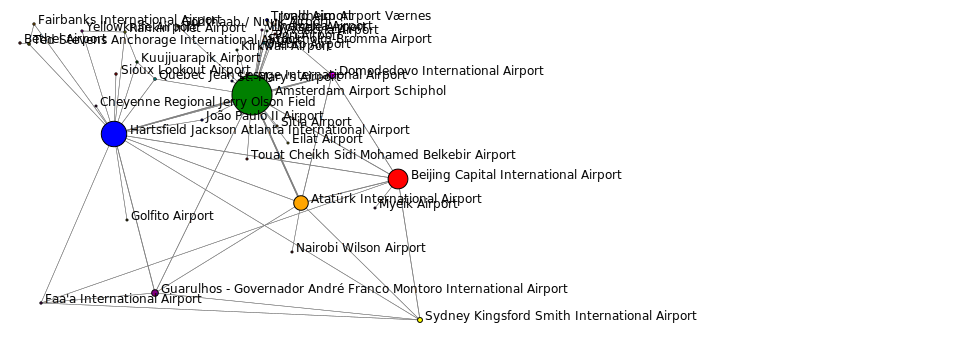

In [30]:
adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, position_aggregate, names=names[airports], labels=labels[airports], display_node_weight=True)
SVG(image)

In [31]:
idx = np.where(counts>100)[0]
v = adjacency_aggregate.sum(axis=1)[idx].flatten()
int_degree = adjacency_aggregate.diagonal()[idx]
idx_max = np.argmax(int_degree/v)
print("The strongest cluster is", idx_max)

The strongest cluster is 1


## 2. Directed graphs

## Wikipedia Vitals

In [32]:
graph = wikivitals

In [33]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Which of these clusters is the strongest? the weakest?
* Display the bipartite graph linking these clusters to their ground-truth labels.
* Display the same graph restricted to the main ground-truth labels of each cluster, each representing at least 10% of the labels of the cluster.
* Repeat the same experiments at resolution 2.

In [34]:

louvain = Louvain(resolution=1)
labels = louvain.fit_transform(adjacency)

In [46]:

from sklearn.metrics import top_k_accuracy_score


pagerank = PageRank()
top_pages = []
for label in np.unique(labels):
    cluster = np.where(labels==label)[0]
    seeds = {node: 1 for node in cluster}
    scores = pagerank.fit_transform(adjacency, seeds)
    top_nodes = cluster[top_k(scores[cluster], 5)]
    print(names[top_nodes], len(cluster))
    top_pages.append(top_nodes[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

## 3. Bipartite graphs

## Cinema

In [ ]:
graph = cinema

In [ ]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Cluster the graph by Louvain (resolution 1). 
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of these cluster in terms of Personalized PageRank.
* Give the strongest cluster among all clusters with at least 100 movies.

## Quiz

In [ ]:
adj = [[1, 2], [0, 2, 3, 4], [0, 1, 3, 4, 5], [1, 2, 4], [1, 2, 3, 7], [2, 6], [
    5, 7, 8], [6, 4, 8], [6, 7, 9, 10], [8], [8, 11, 12], [10, 12], [10, 11, 13, 14], [12, 14], [12, 13]]

adjacency = np.zeros((15,15), dtype=int)

for idx, line in enumerate(adj):
    for x in line:
        adjacency[idx, x] = 1

print(adjacency)

# checking if adjacency is symmetric
print("Is the adjacency matrix symmetric?", np.allclose(adjacency, adjacency.T))

# counting the number of 1 in adjacency
print("The number of 1 in the adjacency matrix is", np.sum(adjacency))

louvain = Louvain()
labels = louvain.fit_predict(adjacency)

print(labels)

get_modularity(adjacency, labels)

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]]
Is the adjacency matrix symmetric? True
The number of 1 in the adjacency matrix is 44
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


0.5216942148760331

In [3]:
adjacency = np.array([[6, 2, 0], [2, 2, 4], [0, 4, 4]])
labels = np.array([0, 1, 2])
get_modularity(adjacency, labels)

0.16666666666666669

In [ ]:
12/(12+2)

0.8571428571428571

[[0 1 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 1 0]
 [0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 1 0 0 1 0 1 1]
 [0 0 1 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]]
Is the adjacency matrix symmetric? True


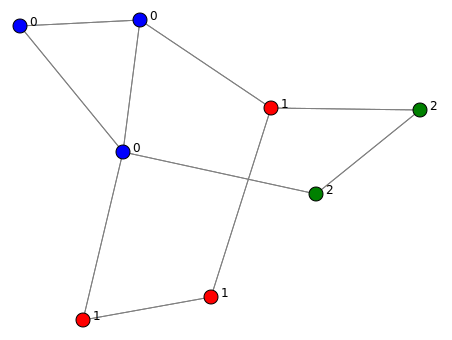

[5 6 7]
The strength of cluster 0 is 0.6666666666666666
[0 1 2]
The strength of cluster 1 is 0.5714285714285714
[3 4]
The strength of cluster 2 is 0.5


In [35]:
neighbors = [
    [1, 2],
    [0, 5],
    [0, 3, 6],
    [2, 4],
    [3, 5],
    [1, 4, 6, 7],
    [2, 5, 7],
    [5, 6]
]

adjacency = np.zeros((8, 8), dtype=int)
for i, line in enumerate(neighbors):
    for j in line:
        adjacency[i, j] = 1

print(adjacency)

# is the adjacency matrix symmetric?
print("Is the adjacency matrix symmetric?", np.allclose(adjacency, adjacency.T))

labels = np.array([1, 1, 1, 2, 2, 0, 0, 0])

# import csr matrix
from scipy import sparse

adjacency_csr = sparse.csr_matrix(adjacency)

image = svg_graph(adjacency_csr, labels=labels, names=labels)
display(SVG(image))

from sknetwork.clustering import get_modularity

# compute clusters strength

def cluster_strength(adjacency, labels):
    for label in np.unique(labels):
        cluster = np.where(labels == label)[0]
        print(cluster)
        degree_internal_cluster = adjacency[cluster, :][:, cluster].sum()
        tot_degree_cluster = adjacency[cluster, :].sum()
        print("The strength of cluster", label, "is", degree_internal_cluster/tot_degree_cluster)

cluster_strength(adjacency, labels)

